In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Increase the font size to 16
plt.rcParams.update({'font.size': 16})

# This reads each line of the data file and stores it as an array of strings
data = np.loadtxt('data.csv', delimiter=',', dtype=str)

In [3]:
labels = data[0]

pixels = data[1:,0]
print(labels, pixels)

exp_1_1 = data[1: ,1]
exp_1_2 = data[1:,2]
exp_1_3 = data[1:,3]
exp_2_1 = data[1:,4]
exp_2_2 = data[1:,5]
exp_2_3 = data[1:,6]
exp_3_1 = data[1:,7]
exp_3_2 = data[1:,8]
exp_3_3 = data[1:,9]
exp_4 = data[1:,10]

names_list = [
    exp_1_1, exp_1_2, exp_1_3,
    exp_2_1, exp_2_2, exp_2_3,
    exp_3_1, exp_3_2, exp_3_3,
    exp_4
]


['\ufeff1.1 a' '1.1 b' '1.2 b' '1.3 b' '2.1 b' '2.2 b' '2.3 b' '3.1b'
 '3.2 b' '3.3 b' '4 b '] ['0' '1' '2' ... '2045' '2046' '2047']


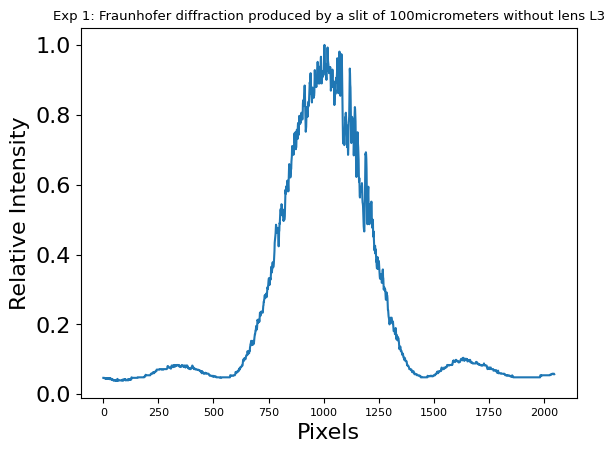

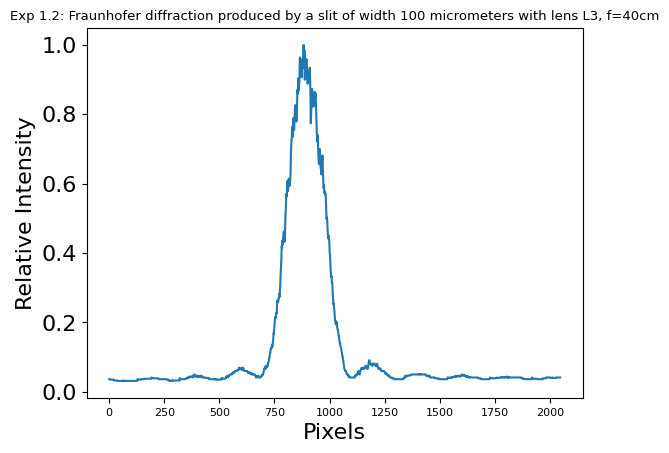

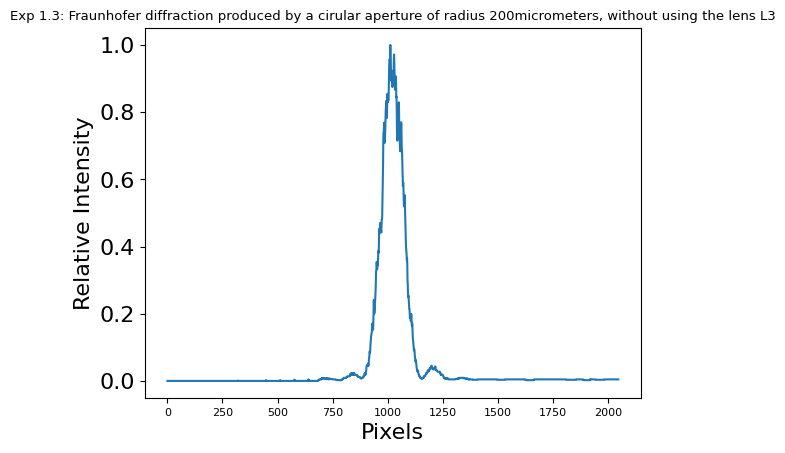

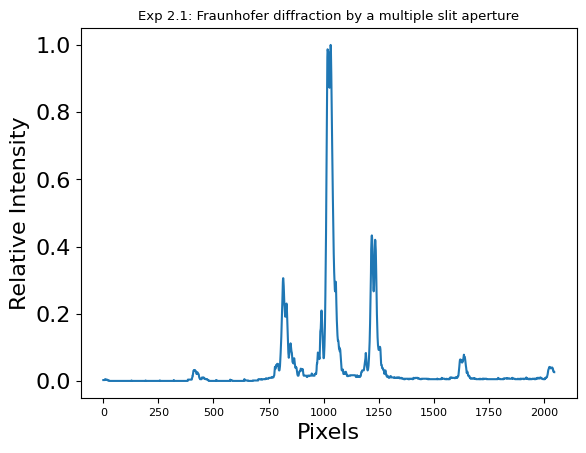

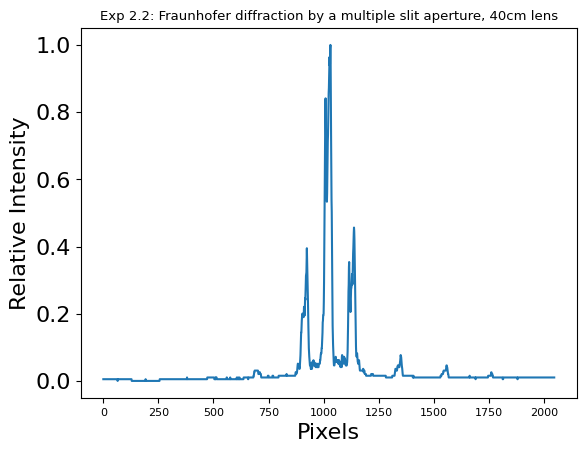

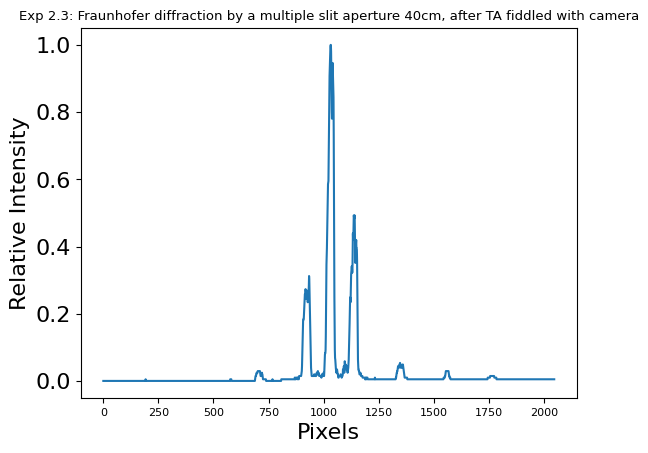

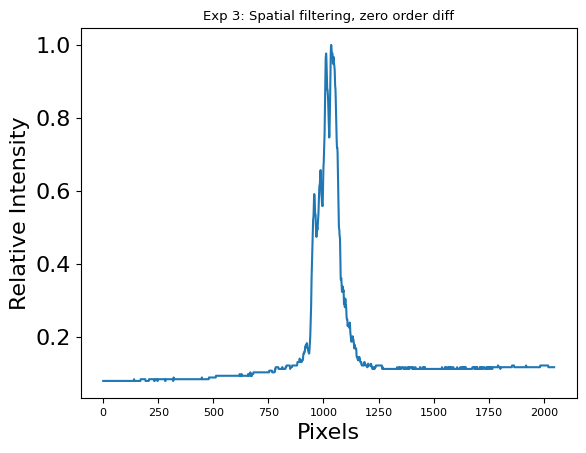

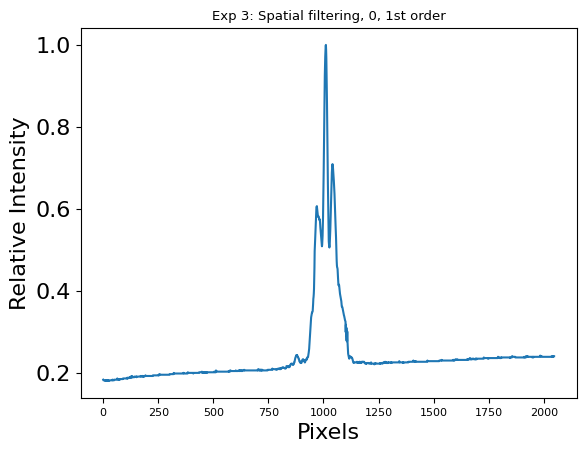

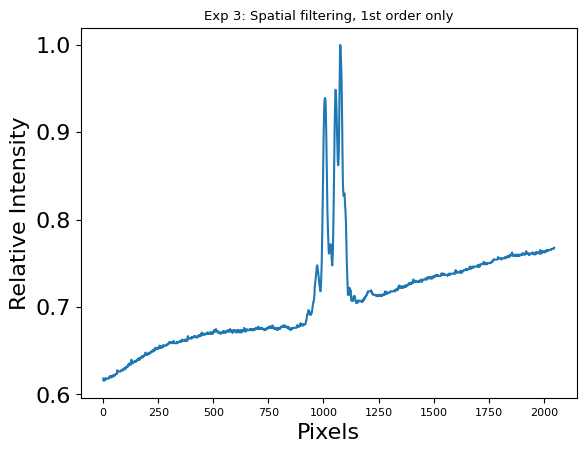

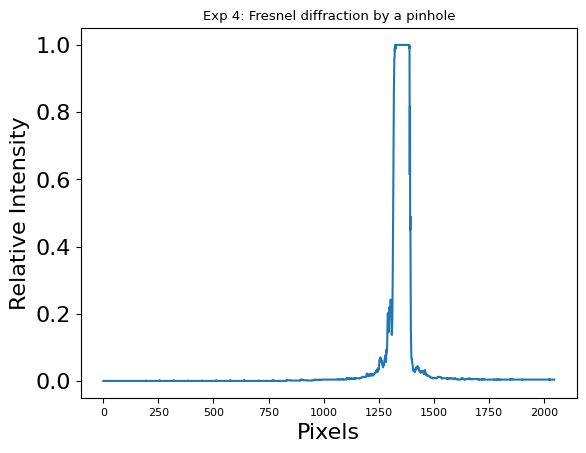

In [4]:
graph_names = [
    "Exp 1: Fraunhofer diffraction produced by a slit of 100micrometers without lens L3", "Exp 1.2: Fraunhofer diffraction produced by a slit of width 100 micrometers with lens L3, f=40cm", "Exp 1.3: Fraunhofer diffraction produced by a cirular aperture of radius 200micrometers, without using the lens L3",
    "Exp 2.1: Fraunhofer diffraction by a multiple slit aperture", "Exp 2.2: Fraunhofer diffraction by a multiple slit aperture, 40cm lens", "Exp 2.3: Fraunhofer diffraction by a multiple slit aperture 40cm, after TA fiddled with camera",
    "Exp 3: Spatial filtering, zero order diff", "Exp 3: Spatial filtering, 0, 1st order", "Exp 3: Spatial filtering, 1st order only", "Exp 4: Fresnel diffraction by a pinhole"
]

data_calc =[]
# Assuming 'pixels' and 'names_list' contain numerical data
for i, m in enumerate(names_list):
    
    m = np.array(m, dtype=float)  # Convert to numpy array of floats
    ma = np.max(m)  # Use np.max instead of max for numpy arrays
    m_new = m / ma
    
    data_calc.append(m_new)
    
    plt.plot(pixels, m_new)
    
    plt.title(graph_names[i], fontsize=9.5)
    
    xticks_positions = np.arange(0, len(pixels), 250) 
    plt.xticks(xticks_positions, fontsize=8)  # Adjust fontsize to make x ticks smaller
    
    plt.xlabel("Pixels")  
    plt.ylabel("Relative Intensity")
    plt.show()


Experiment 1: 

0
1
2


/tmp/ipykernel_1289/1322853971.py:29: RuntimeWarning: invalid value encountered in scalar divide
  i = (np.sin(B)/B)**2                       #irradience at the diffraction angle according to the effective focal length


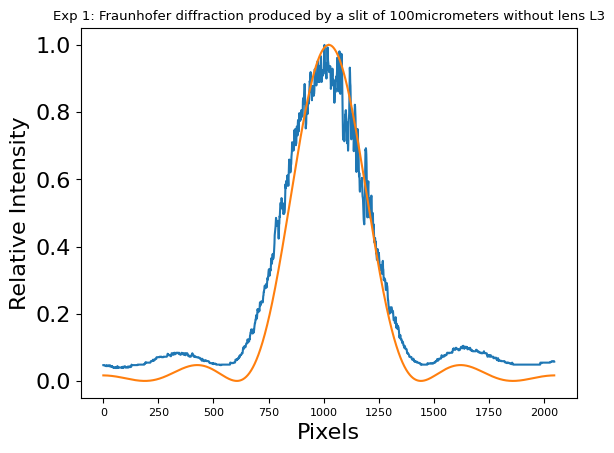

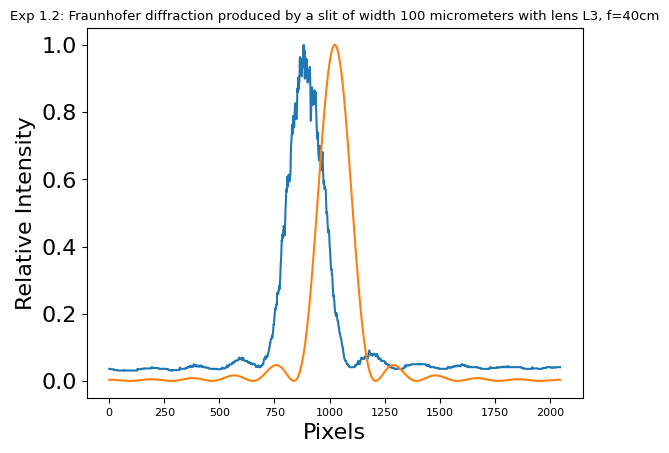

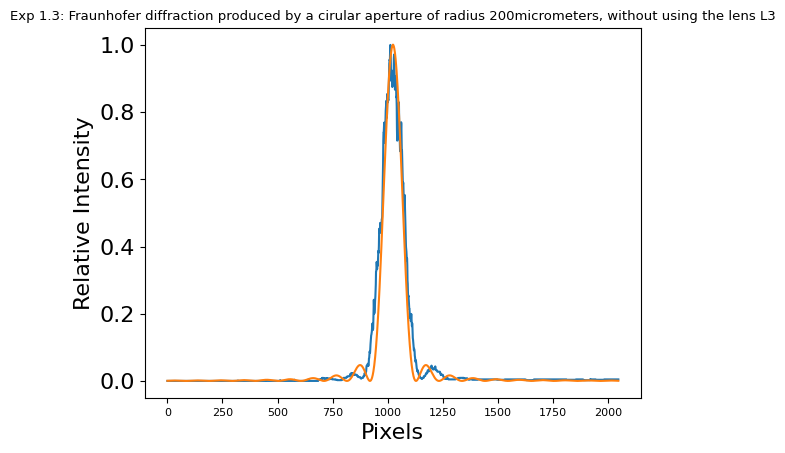

In [5]:

graph_names = [
    "Exp 1: Fraunhofer diffraction produced by a slit of 100micrometers without lens L3", "Exp 1.2: Fraunhofer diffraction produced by a slit of width 100 micrometers with lens L3, f=40cm", "Exp 1.3: Fraunhofer diffraction produced by a cirular aperture of radius 200micrometers, without using the lens L3",
]

#slit widths
bli = [100*(10**-6), 100*(10**-6), 400*(10**-6) ]
#wavelength
w = 650*(10**-9)
#wave number
k = (2*np.pi)/w
#focal lengths
f= [90*10**-2, 40*10**-2, 90*10**-2, 40*10**-2]
#list to hold the 
the_list = []
p = list(np.arange(0,2049,1))

#calculating the simulated diffraction 
for i, bn in enumerate(bli):
    b = bli[i]
    focal = f[i]
    xlist = []
    Ilist = []
    print(i)
    for a in range(0,2048):
        k = (2*np.pi)/w
        xa= (1024-p[a])*(14*10**-6)     #distance from middle too nth pixel in micrometers, eqcah pixel = 14 micrometers
        x = np.arctan(xa/focal)         #diiffraction angle according to the effective focal length 
        B = k*b/2*np.sin(x)             #B = kb /2 times the sin of the diffraction angle
        i = (np.sin(B)/B)**2                       #irradience at the diffraction angle according to the effective focal length 
        
        xlist.append(x)                 #append the diffraction angle according to the effective focal length 
        Ilist.append(i)                 #the irradience 
    the_list.append(Ilist)

#plotting the simulatioon vs the real things
for i, m in enumerate(bli):
    fig, ax = plt.subplots()
    ax.plot(pixels, data_calc[i])
    ax.plot(pixels, the_list[i])

    plt.title(graph_names[i], fontsize=9.5)

    xticks_positions = np.arange(0, len(pixels), 250) 
    plt.xticks(xticks_positions, fontsize=8)  # Adjust fontsize to make x ticks smaller

    plt.xlabel("Pixels")  
    plt.ylabel("Relative Intensity")
    plt.show()

0


/tmp/ipykernel_1289/187956409.py:36: RuntimeWarning: invalid value encountered in scalar divide
  i = (2 * j1(ka_sin_theta) / ka_sin_theta) ** 2                      #irradience at the diffraction angle according , using eqn 2 from the lab manual


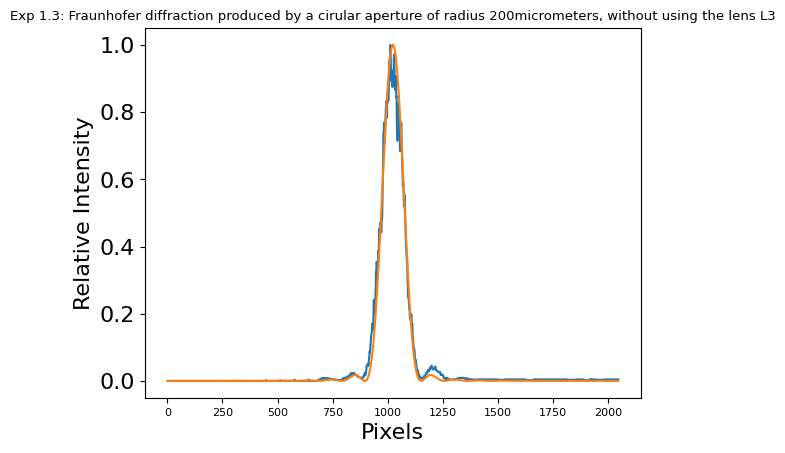

In [6]:
from scipy.special import j1  # First-order Bessel functio

graph_names = [
     "Exp 1.3: Fraunhofer diffraction produced by a cirular aperture of radius 200micrometers, without using the lens L3"
]

#slit widths
bli = [400*(10**-6) ]
#wavelength
w = 650*(10**-9)
#wave number
k = (2*np.pi)/w
#focal lengths
f= [90*10**-2, 40*10**-2, 90*10**-2, 40*10**-2]
#list to hold the 
the_list = []

hole_radius = 200e-6  # Hole radius in meters (400 µm diameter, so radius is 200 µm)
p = list(np.arange(0,2049,1))

#calculating the simulated diffraction 
for i, bn in enumerate(bli):
    b = bli[i]
    focal = f[i]
    xlist = []
    Ilist = []
    print(i)
    for a in range(0,2048):
        k = (2*np.pi)/w
        xa= (1024-p[a])*(14*10**-6)     #distance from middle too nth pixel in micrometers, eqcah pixel = 14 micrometers
        x = np.arctan(xa/focal)         #diiffraction angle according to the effective focal length 
        B = k*b/2*np.sin(x)             #B = kb /2 times the sin of the diffraction angle
        
        ka_sin_theta = k * hole_radius * np.sin(x)
        
        i = (2 * j1(ka_sin_theta) / ka_sin_theta) ** 2                      #irradience at the diffraction angle according , using eqn 2 from the lab manual 
        
        xlist.append(x)                 #append the diffraction angle according to the effective focal length 
        Ilist.append(i)                 #the irradience 
    the_list.append(Ilist)

#plotting the simulatioon vs the real things for the 3rd graph , with radius and circular aperture. 
for i, m in enumerate(bli):
    fig, ax = plt.subplots()
    ax.plot(pixels, data_calc[2])
    ax.plot(pixels, the_list[i])

    plt.title(graph_names[i], fontsize=9.5)

    xticks_positions = np.arange(0, len(pixels), 250) 
    plt.xticks(xticks_positions, fontsize=8)  # Adjust fontsize to make x ticks smaller

    plt.xlabel("Pixels")  
    plt.ylabel("Relative Intensity")
    plt.show()

Experiment 2

/tmp/ipykernel_1289/1466933903.py:33: RuntimeWarning: invalid value encountered in scalar divide
  I_theta = I0 * (np.sin(beta) / beta)**2 * (np.sin(N * alpha) / np.sin(alpha))**2


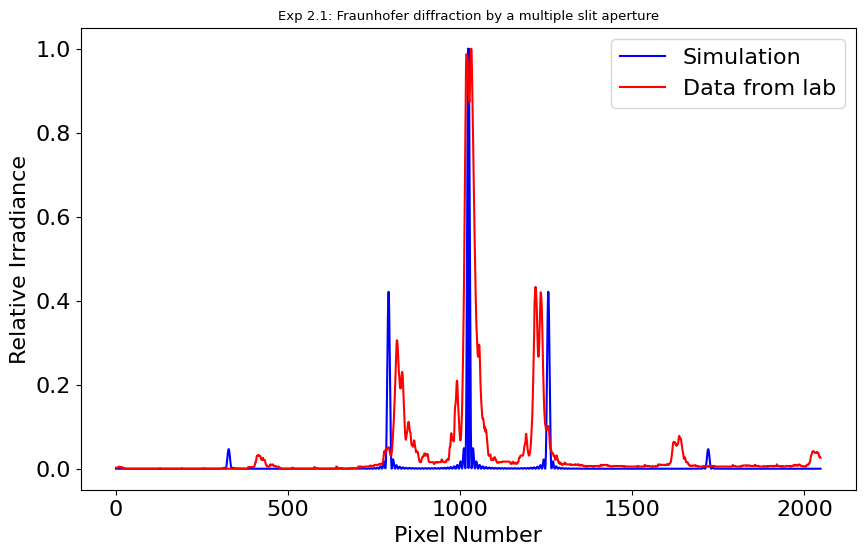

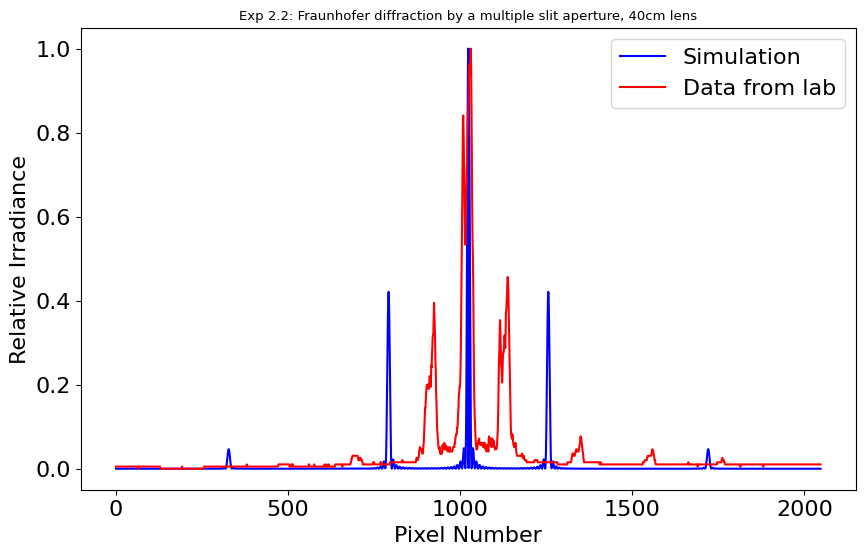

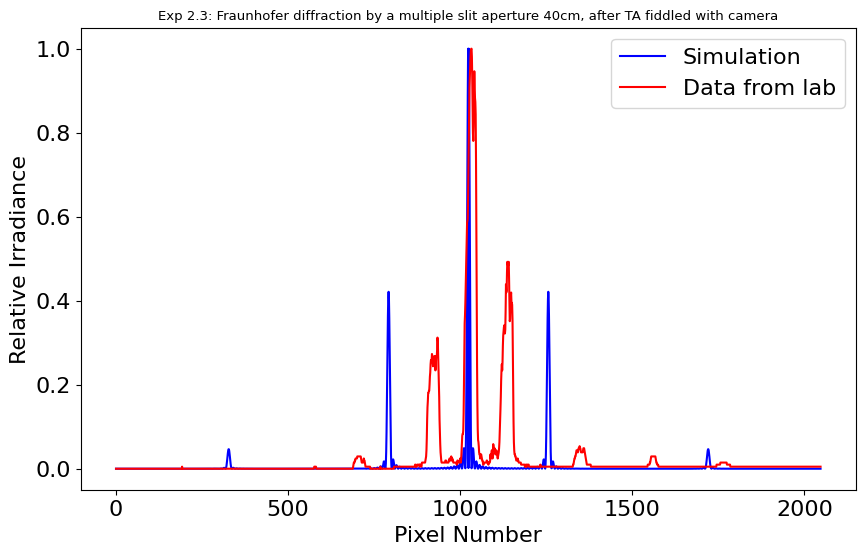

In [7]:

graph_names = [
    "Exp 2.1: Fraunhofer diffraction by a multiple slit aperture", "Exp 2.2: Fraunhofer diffraction by a multiple slit aperture, 40cm lens", "Exp 2.3: Fraunhofer diffraction by a multiple slit aperture 40cm, after TA fiddled with camera",
]


data_calc_2 = data_calc[3:6]

#Chat gpt
# Constants
wavelength = 650e-9  # Wavelength of light in meters (example: 650 nm)
k = 2 * np.pi / wavelength  # Wave number
b = 40e-6  # Width of each slit in meters (40 µm)
a = 80e-6  # Distance between slits in meters (80 µm)
N = 25  # Number of slits
focal_length = 40e-2  # Focal length of lens L3 in meters (20 cm)
pixel_size = 14e-6  # Size of each CCD camera pixel in meters (14 µm)

# Simulated diffraction using pixel angles
pixels = np.arange(0, 2048)  # Pixel range (e.g., 2048 pixels)
Ilist = []  # List to store irradiance values

for p in pixels:
    # Distance from the center to nth pixel
    xa = (1024 - p) * pixel_size  # Distance from the center in meters
    theta = np.arctan(xa / focal_length)  # Diffraction angle using effective focal length

    # Calculating beta and alpha
    beta = (k * b / 2) * np.sin(theta)
    alpha = (k * a / 2) * np.sin(theta)

    # Irradiance calculation
    I0 = 1 / N**2  # Normalization factor
    I_theta = I0 * (np.sin(beta) / beta)**2 * (np.sin(N * alpha) / np.sin(alpha))**2

    # Handle cases where beta or alpha are zero to avoid division by zero
    if np.isnan(I_theta) or np.isinf(I_theta):
        I_theta = I0  # Replace NaN or Inf values with I0

    Ilist.append(I_theta)  # Append the irradiance value

# Normalize the irradiance for plotting
Ilist = np.array(Ilist)
Ilist /= max(Ilist)  # Normalize to the maximum value

for i in range(len(data_calc_2)):
    # Plotting the simulated diffraction pattern
    plt.figure(figsize=(10, 6))
    plt.plot(pixels, Ilist, label="Simulation", color="blue")
    plt.plot(pixels, data_calc_2[i], label = "Data from lab", color = 'red')
    plt.title(graph_names[i], fontsize=9.5)

    plt.xlabel("Pixel Number")
    plt.ylabel("Relative Irradiance")
    plt.legend()
    plt.show()


experiment 3


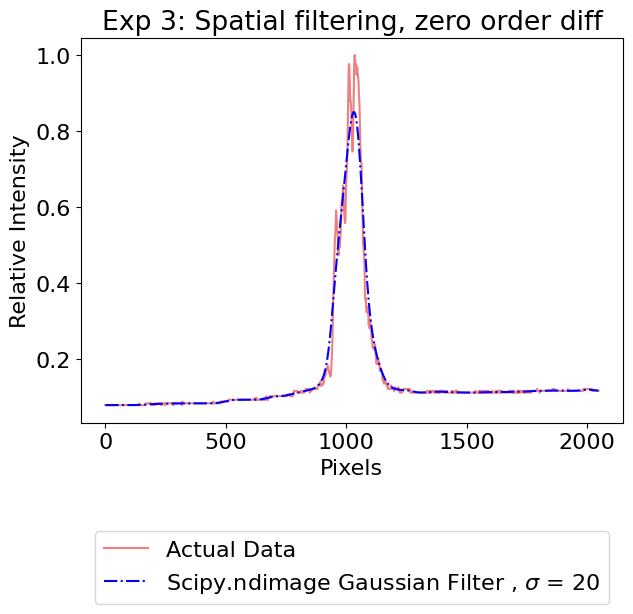

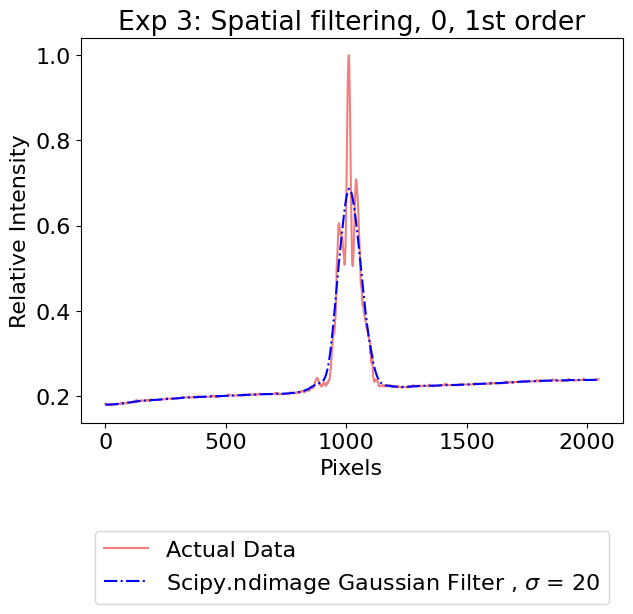

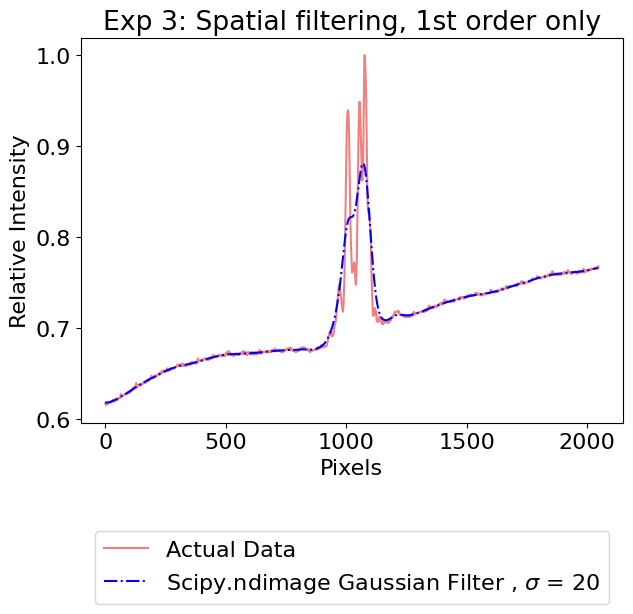

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

graph_names = [
    "Exp 3: Spatial filtering, zero order diff", "Exp 3: Spatial filtering, 0, 1st order", "Exp 3: Spatial filtering, 1st order only", "Exp 4: Fresnel diffraction by a pinhole"
]

data_calc_3 = data_calc[6:9]

# Simulated data smoothing for demonstration
sig = 20

for x in range(len(data_calc_3)):
    smoothed_intensity = gaussian_filter1d(data_calc_3[x], sigma=sig)  # Adjust 'sigma' as needed

    plt.figure(figsize=(7, 5))    
    plt.plot(pixels, data_calc_3[x], label="Actual Data", color="lightcoral")

    plt.plot(pixels, smoothed_intensity, label=fr"Scipy.ndimage Gaussian Filter , $\sigma$ = {sig}", color="blue", linestyle = '-.')

    plt.title(graph_names[x])
    plt.xlabel("Pixels")
    plt.ylabel("Relative Intensity")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5))
    plt.show()
